In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
forest=pd.read_csv("forestfires.csv")

In [3]:
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
forest.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
forest.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [14]:
forest.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

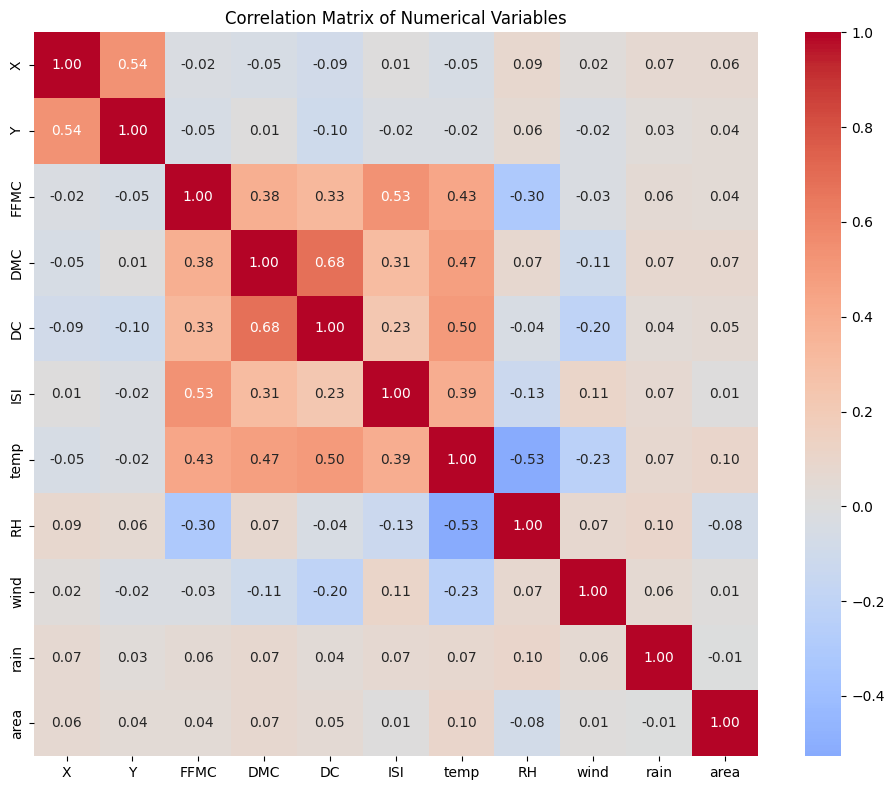

In [8]:
def show_correlation_matrix(df):
    """
    Calculate and display correlation matrix for numerical variables
    """
    numerical_cols = df.select_dtypes(include=['number']).columns

    correlation_matrix = df[numerical_cols].corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.2f')
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()
    return correlation_matrix

correlation_matrix = show_correlation_matrix(forest)


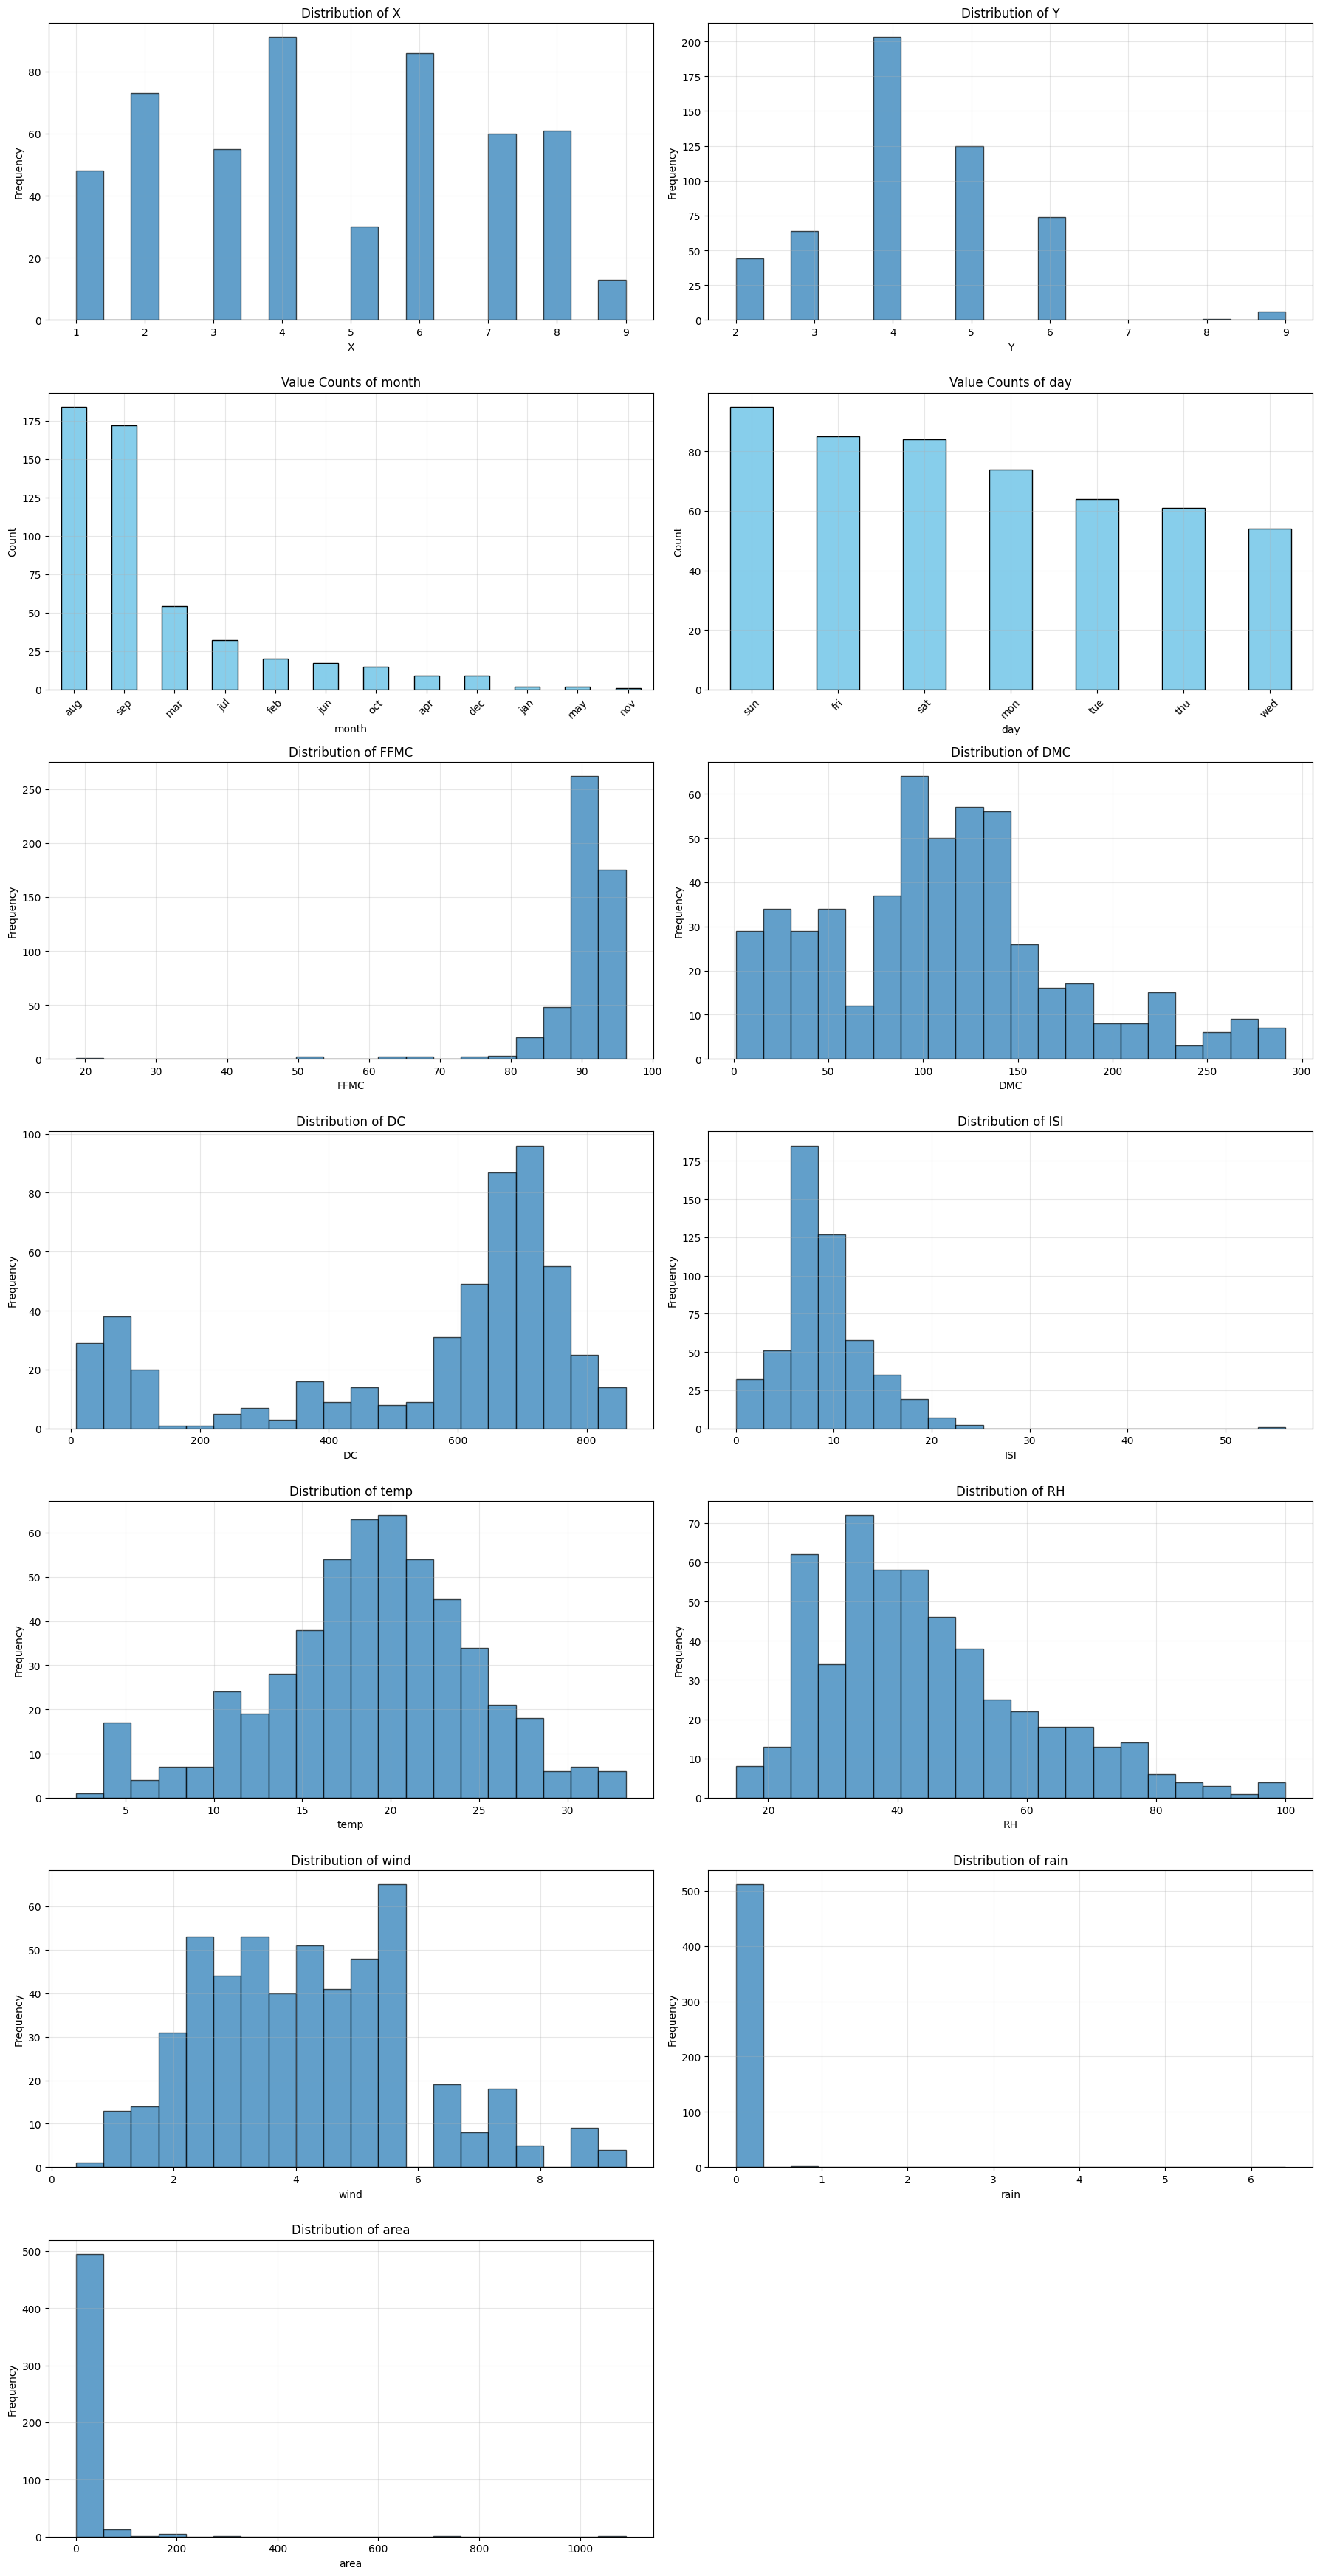

In [9]:
# Function to create bar plots for each attribute
def plot_bar_charts(df):
    """
    Create bar plots for all variables in the dataset
    """
    # Get all columns
    all_cols = df.columns
    
    # Calculate number of rows and columns for subplots
    n_cols = 2  # Number of columns in subplot grid
    n_rows = (len(all_cols) + n_cols - 1) // n_cols  # Calculate rows needed
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    
    # Flatten axes array if more than one row
    if n_rows > 1:
        axes = axes.flatten()
    elif n_rows == 1 and len(all_cols) > 1:
        axes = axes
    else:
        axes = [axes]
    
    # Create bar plot for each column
    for i, col in enumerate(all_cols):
        if i < len(axes):
            # For numerical columns, create histogram-like bar plot
            if df[col].dtype in ['int64', 'float64']:
                # Create bins for numerical data
                df[col].hist(bins=20, ax=axes[i], alpha=0.7, edgecolor='black')
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')
            else:
                # For categorical columns, create value counts bar plot
                value_counts = df[col].value_counts()
                value_counts.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
                axes[i].set_title(f'Value Counts of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Count')
                axes[i].tick_params(axis='x', rotation=45)
            
            axes[i].grid(True, alpha=0.3)
    
    # Hide any unused subplots
    for i in range(len(all_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

plot_bar_charts(forest)

In [10]:
# Function to check for imbalanced values and anomalies
def check_imbalanced_values(df, threshold=0.05):
    """
    Check for imbalanced values in categorical variables and anomalies in numerical variables
    threshold: minimum percentage for a category to be considered balanced (default 5%)
    """
    print("IMBALANCED VALUES ANALYSIS")
    print("=" * 60)
    
    # Check categorical variables for imbalance
    categorical_cols = df.select_dtypes(include=['object']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    print("\n1. CATEGORICAL VARIABLES IMBALANCE:")
    print("-" * 40)
    
    imbalanced_found = False
    for col in categorical_cols:
        value_counts = df[col].value_counts()
        percentages = (value_counts / len(df)) * 100
        
        print(f"\n{col}:")
        for value, count in value_counts.items():
            percentage = (count / len(df)) * 100
            status = "⚠️ IMBALANCED" if percentage < threshold * 100 else "✅ Balanced"
            print(f"  {value}: {count} ({percentage:.1f}%) {status}")
        
        # Check if any category is severely imbalanced
        min_percentage = percentages.min()
        if min_percentage < threshold * 100:
            imbalanced_found = True
            print(f"  🔍 Smallest category represents only {min_percentage:.1f}% of data")
    
    if not imbalanced_found:
        print("  ✅ No severely imbalanced categorical variables found")
    
    # Check numerical variables for anomalies (outliers)
    print(f"\n\n2. NUMERICAL VARIABLES ANOMALIES (OUTLIERS):")
    print("-" * 45)
    
    outliers_found = False
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        print(f"\n{col}:")
        print(f"  Total values: {len(df[col])}")
        print(f"  Outliers: {outlier_count} ({outlier_percentage:.1f}%)")
        print(f"  Normal range: {lower_bound:.2f} to {upper_bound:.2f}")
        
        if outlier_count > 0:
            outliers_found = True
            print(f"  Min outlier: {outliers[col].min():.2f}")
            print(f"  Max outlier: {outliers[col].max():.2f}")
            if outlier_percentage > 5:
                print(f"  ⚠️ HIGH ANOMALY RATE: {outlier_percentage:.1f}% of data are outliers")
            else:
                print(f"  ℹ️ Moderate outliers detected")
        else:
            print(f"  ✅ No outliers detected")
    
    if not outliers_found:
        print("  ✅ No outliers found in numerical variables")
    
    # Summary recommendations
    print(f"\n\n3. RECOMMENDATIONS:")
    print("-" * 20)
    
    if imbalanced_found:
        print("📊 For imbalanced categorical data:")
        print("   - Consider using stratified sampling")
        print("   - Apply SMOTE or other balancing techniques")
        print("   - Use appropriate evaluation metrics (F1, precision, recall)")
    
    if outliers_found:
        print("🔍 For numerical outliers:")
        print("   - Investigate if outliers are data errors or genuine extreme values")
        print("   - Consider outlier removal or transformation")
        print("   - Use robust statistical methods")
        print("   - Consider log transformation for skewed data")
    
    if not imbalanced_found and not outliers_found:
        print("✅ Dataset appears well-balanced with no significant anomalies!")

# Check for imbalanced values and anomalies
check_imbalanced_values(forest)

IMBALANCED VALUES ANALYSIS

1. CATEGORICAL VARIABLES IMBALANCE:
----------------------------------------

month:
  aug: 184 (35.6%) ✅ Balanced
  sep: 172 (33.3%) ✅ Balanced
  mar: 54 (10.4%) ✅ Balanced
  jul: 32 (6.2%) ✅ Balanced
  feb: 20 (3.9%) ⚠️ IMBALANCED
  jun: 17 (3.3%) ⚠️ IMBALANCED
  oct: 15 (2.9%) ⚠️ IMBALANCED
  apr: 9 (1.7%) ⚠️ IMBALANCED
  dec: 9 (1.7%) ⚠️ IMBALANCED
  jan: 2 (0.4%) ⚠️ IMBALANCED
  may: 2 (0.4%) ⚠️ IMBALANCED
  nov: 1 (0.2%) ⚠️ IMBALANCED
  🔍 Smallest category represents only 0.2% of data

day:
  sun: 95 (18.4%) ✅ Balanced
  fri: 85 (16.4%) ✅ Balanced
  sat: 84 (16.2%) ✅ Balanced
  mon: 74 (14.3%) ✅ Balanced
  tue: 64 (12.4%) ✅ Balanced
  thu: 61 (11.8%) ✅ Balanced
  wed: 54 (10.4%) ✅ Balanced


2. NUMERICAL VARIABLES ANOMALIES (OUTLIERS):
---------------------------------------------

X:
  Total values: 517
  Outliers: 0 (0.0%)
  Normal range: -3.00 to 13.00
  ✅ No outliers detected

Y:
  Total values: 517
  Outliers: 51 (9.9%)
  Normal range: 2.50 to 6.5

In [11]:
y = forest['area']
X = forest.drop('area', axis=1)


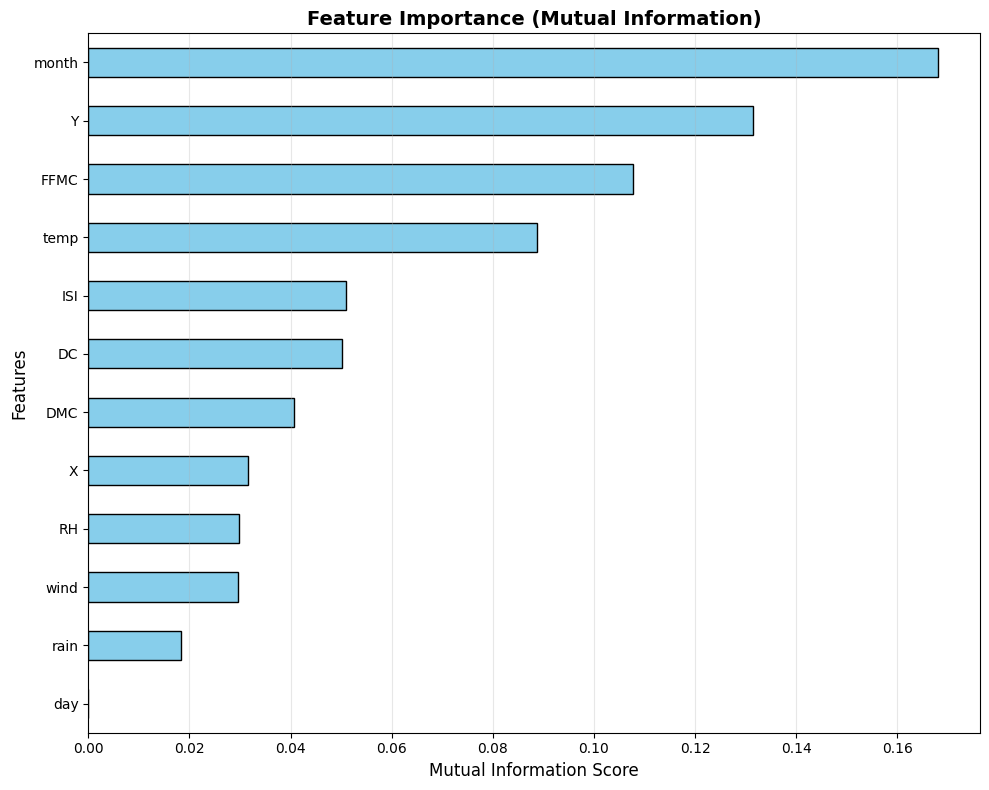

In [13]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Create a copy of x for preprocessing
X_encoded = X.copy()

# Encode categorical variables for mutual information calculation
label_encoders = {}
categorical_columns = X_encoded.select_dtypes(include=['object']).columns



for col in categorical_columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le
   

# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

importance_scores = mutual_info_classif(X_encoded, y_encoded, random_state=42)

# Create feature importance series with proper column names
feat_importance = pd.Series(importance_scores, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=True)

# Display feature importance plot
plt.figure(figsize=(10, 8))
feat_importance.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Feature Importance (Mutual Information)', fontsize=14, fontweight='bold')
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


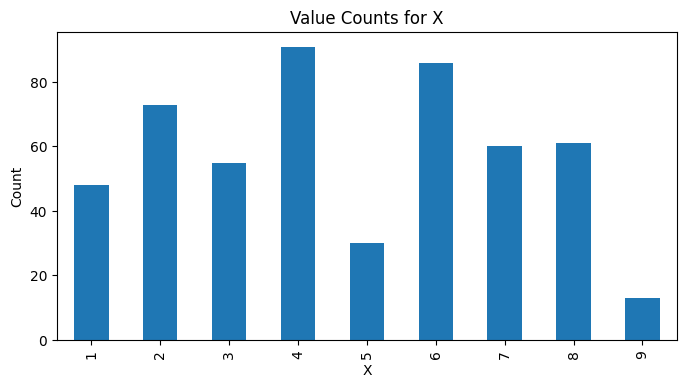

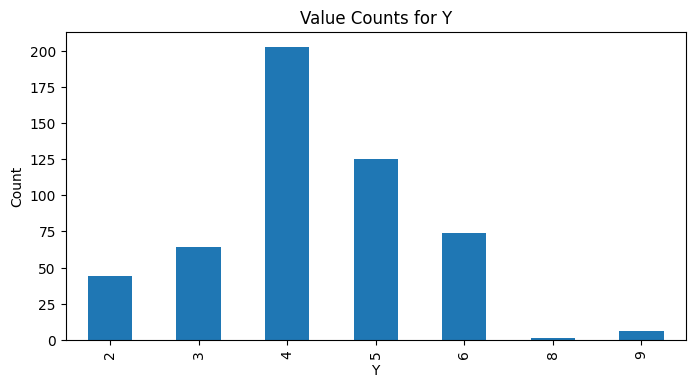

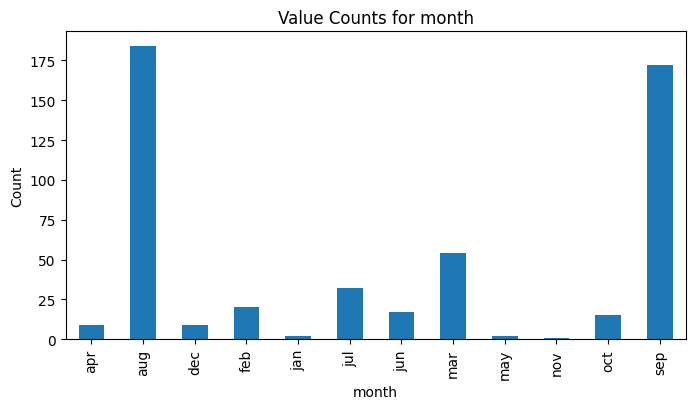

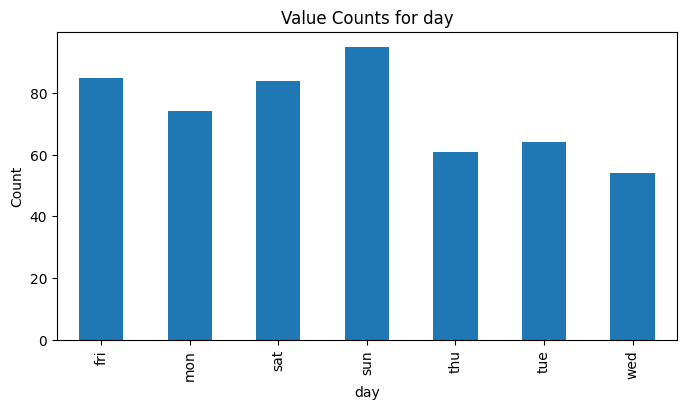

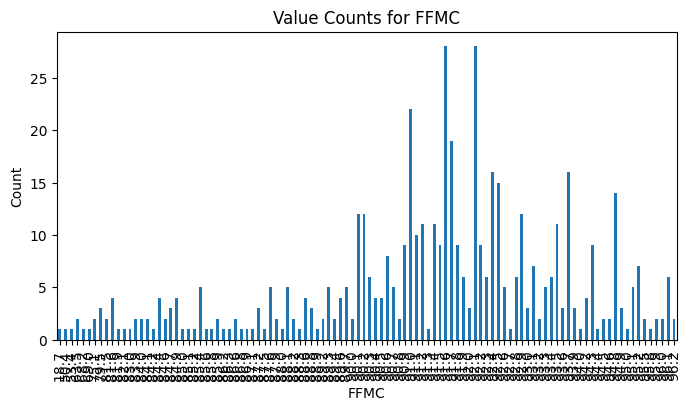

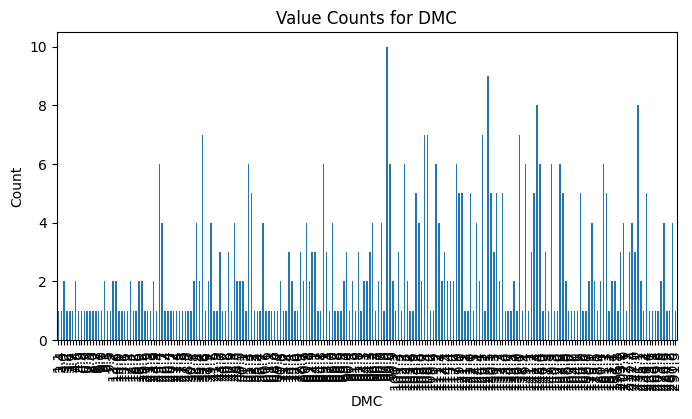

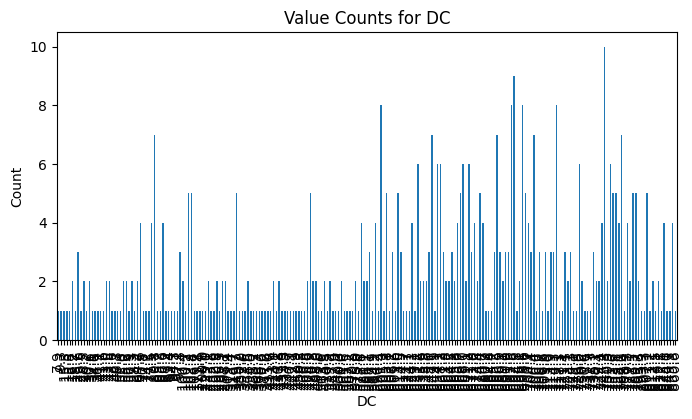

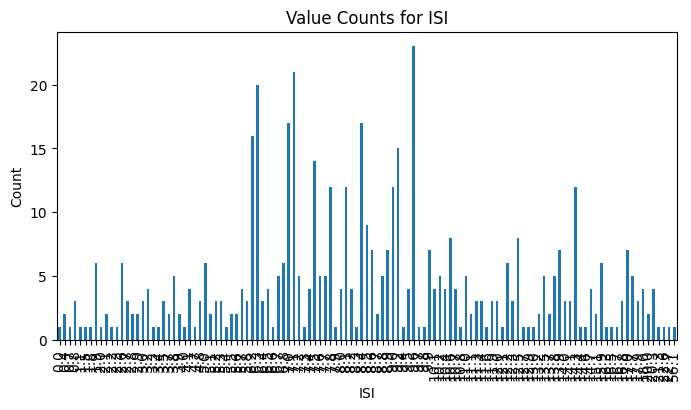

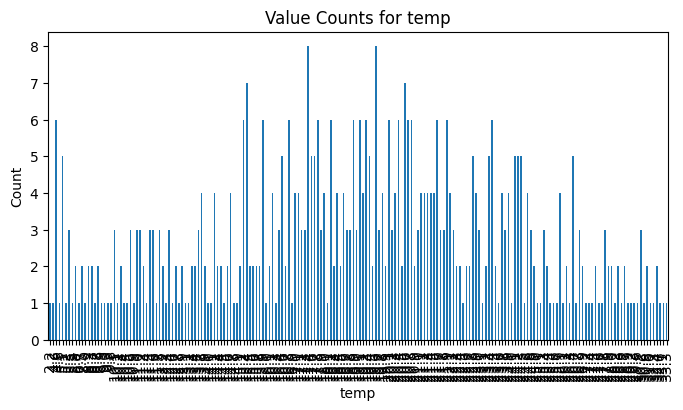

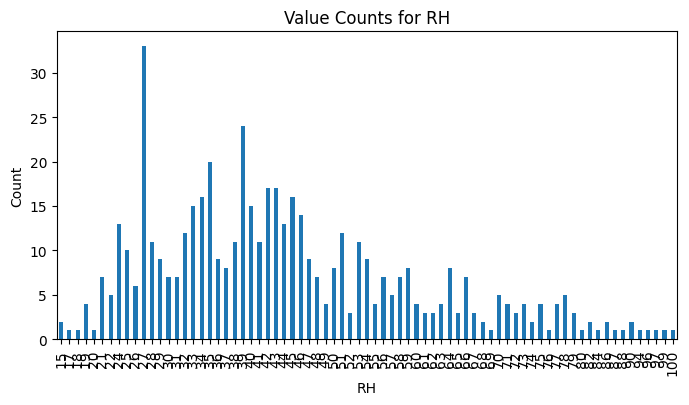

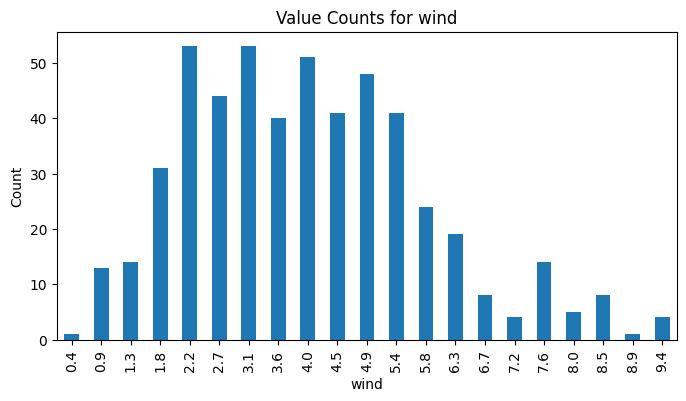

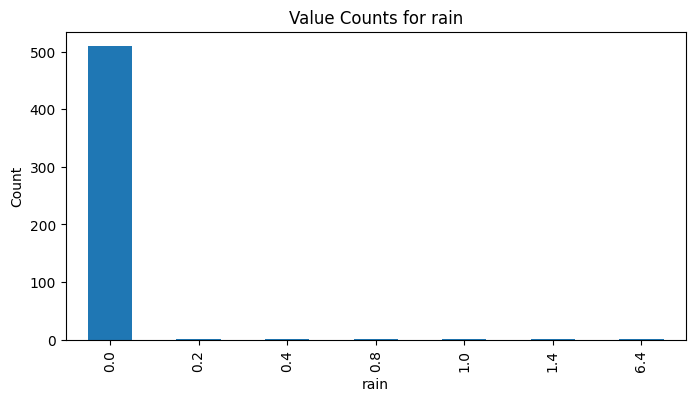

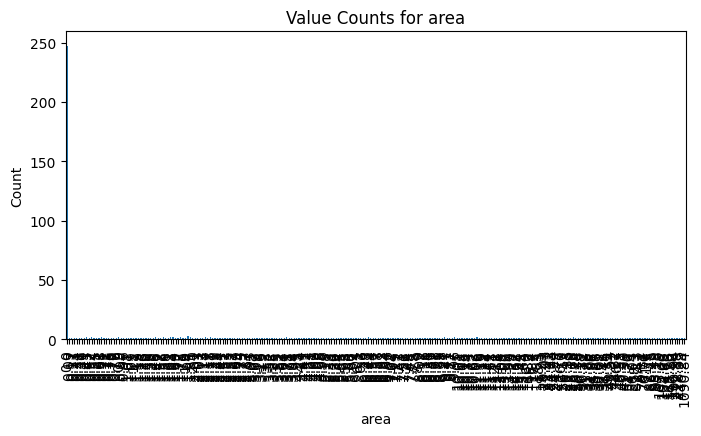

In [16]:
# Set up the figure size and grid for subplots
df=forest
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()